In [5]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data (use any one of the churn datasets for EDA)
df = pd.read_csv(r'../data/Bank_churn.csv')

# Display the first few rows
df.head()


,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,churn
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
# Check for missing values
df.isnull().sum()

# Check data types
df.dtypes


rownumber            int64
customerid           int64
surname             object
creditscore          int64
geography           object
gender              object
age                  int64
tenure               int64
balance            float64
numofproducts        int64
hascrcard            int64
isactivemember       int64
estimatedsalary    float64
churn                int64
dtype: object

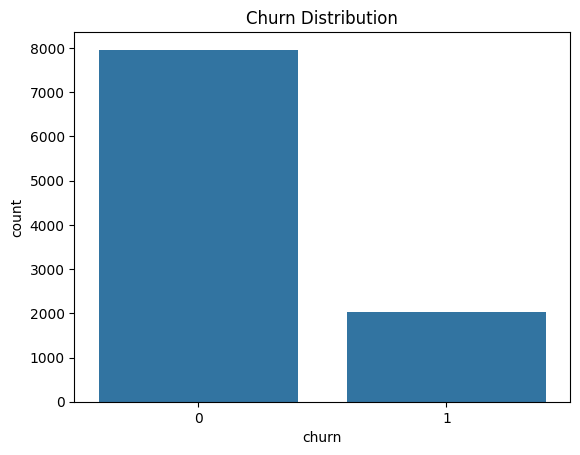

C:\Users\vsume\AppData\Local\Temp\ipykernel_23964\2563278657.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


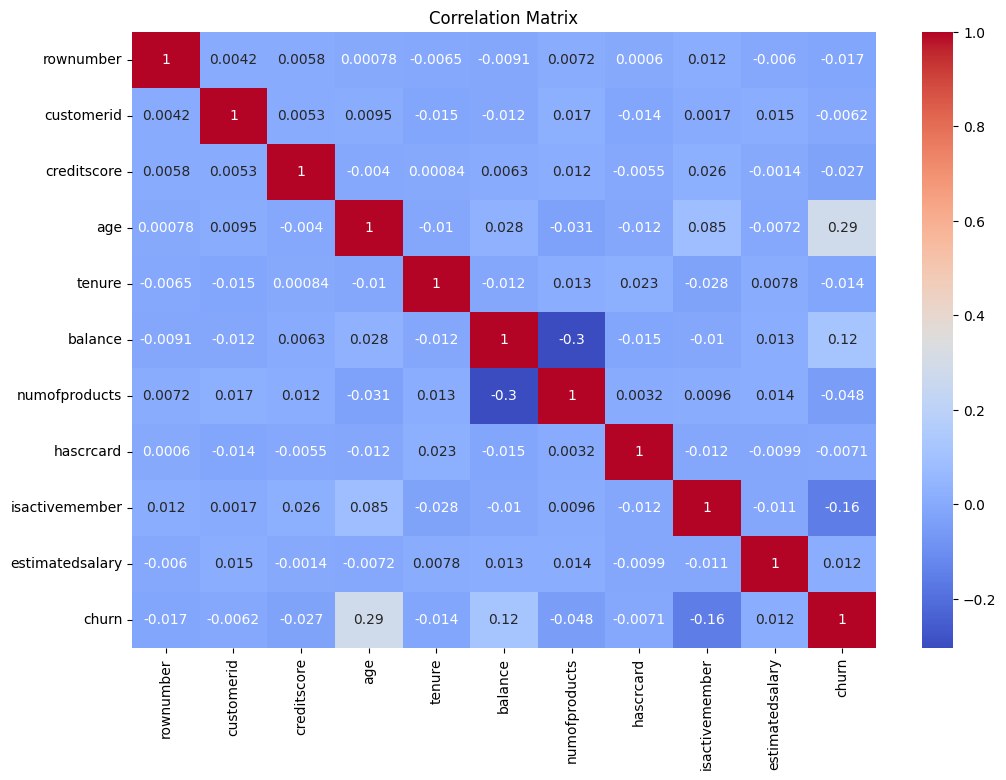

In [7]:
# Summary statistics
df.describe()

# Churn distribution
sns.countplot(x='churn', data=df)
plt.title('Churn Distribution')
plt.show()

# Visualize correlations
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


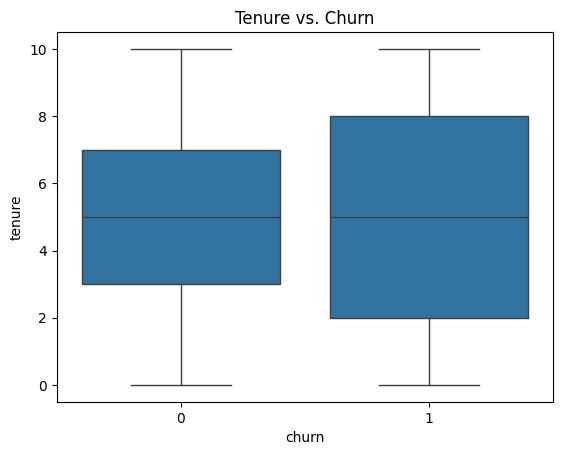

ValueError: Could not interpret value `monthlycharges` for `y`. An entry with this name does not appear in `data`.

In [8]:
# Visualize important features (for example, tenure, monthly charges, etc.)
sns.boxplot(x='churn', y='tenure', data=df)
plt.title('Tenure vs. Churn')
plt.show()

sns.boxplot(x='churn', y='monthlycharges', data=df)
plt.title('Monthly Charges vs. Churn')
plt.show()


Shape of the dataset: (10000, 14)
Columns: Index(['rownumber', 'customerid', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'churn'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rownumber        10000 non-null  int64  
 1   customerid       10000 non-null  int64  
 2   surname          10000 non-null  object 
 3   creditscore      10000 non-null  int64  
 4   geography        10000 non-null  object 
 5   gender           10000 non-null  object 
 6   age              10000 non-null  int64  
 7   tenure           10000 non-null  int64  
 8   balance          10000 non-null  float64
 9   numofproducts    10000 non-null  int64  
 10  hascrcard        10000 non-null  int64  
 11  isactivemember   10000

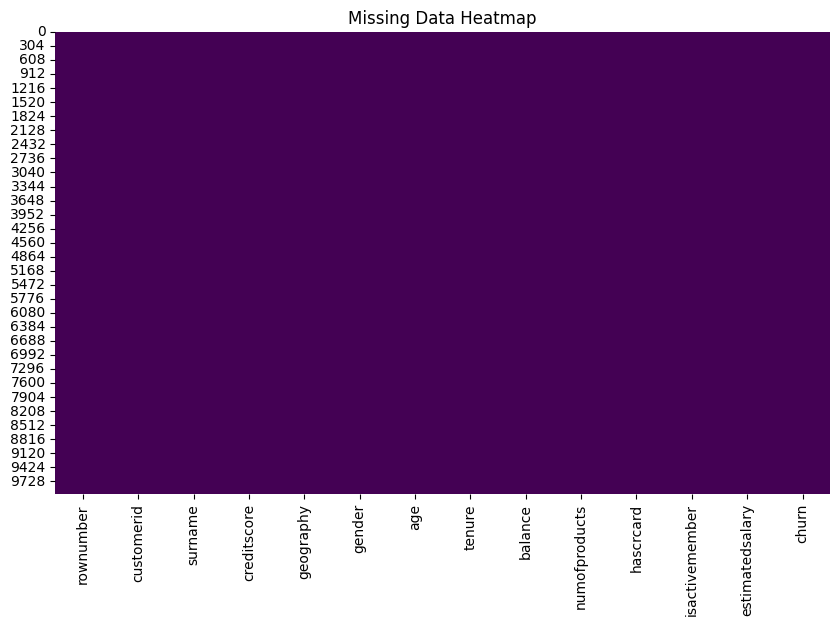

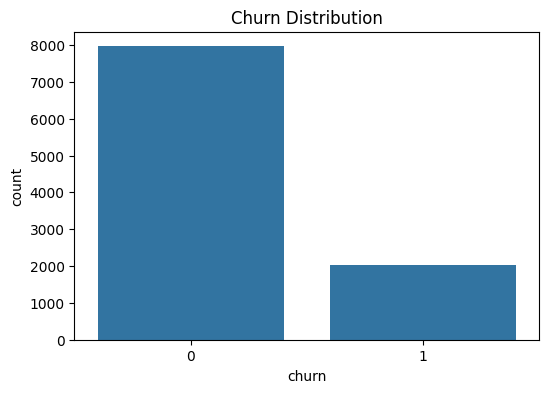

C:\Users\vsume\AppData\Local\Temp\ipykernel_23964\3292626590.py:46: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)


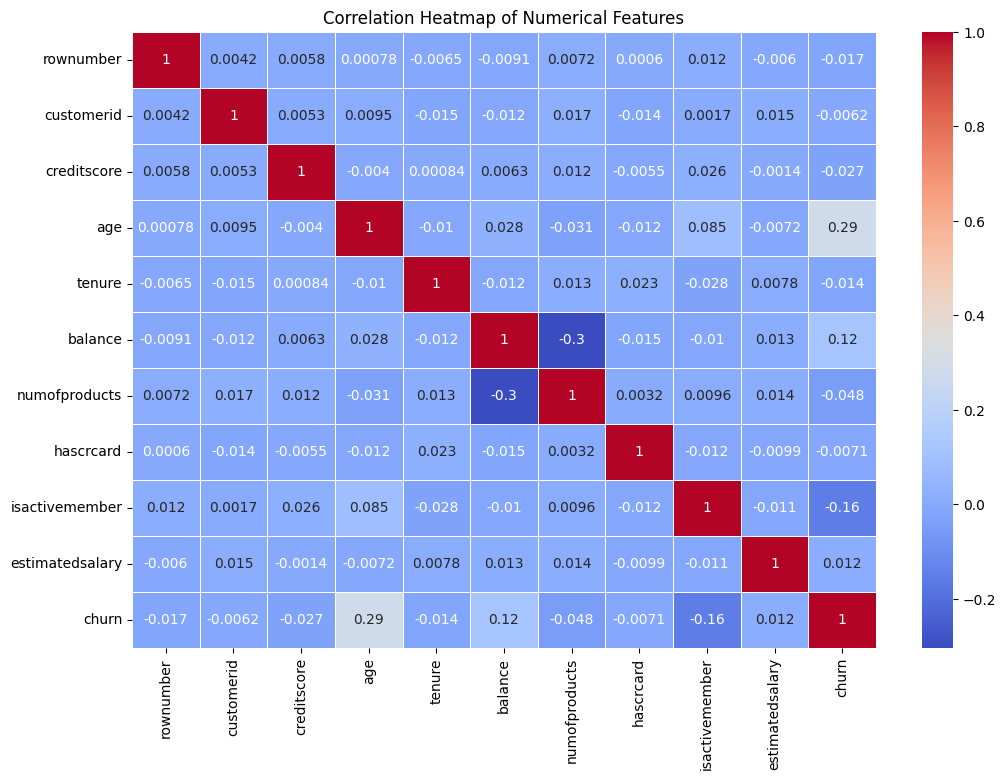

Accuracy: 0.8655
Precision: 0.7719
Recall: 0.4478
ROC-AUC: 0.7077


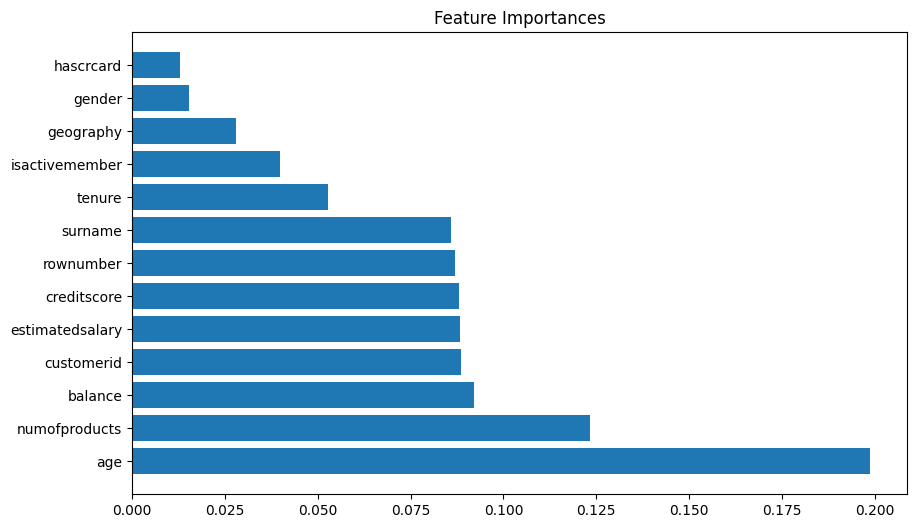

['../src/churn_model.pkl']

In [11]:
# churn_analysis.ipynb

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Step 2: Load Dataset
# Load your dataset from the `data/` folder
df = pd.read_csv('../data/Bank_churn.csv')
df.head()

# Step 3: Basic Information about the Dataset
print(f"Shape of the dataset: {df.shape}")
print(f"Columns: {df.columns}")
df.info()  # Check data types and non-null counts
df.describe()  # Summary statistics

# Step 4: Visualizing Missing Data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

# Step 5: Handle Missing Data
# Fill missing values with median for numeric columns and mode for categorical columns
for column in df.columns:
    if df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        df[column].fillna(df[column].median(), inplace=True)

# Step 6: Visualize Churn Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='churn', data=df)
plt.title('Churn Distribution')
plt.show()

# Step 7: Correlation Heatmap for Numerical Features
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# Step 8: Feature Engineering - Preprocessing Data
# Label Encoding categorical variables and scaling numerical data
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

# Separating features (X) and target (y)
X = df.drop('churn', axis=1)
y = df['churn']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 9: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 10: Model Training - Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 11: Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

# Step 12: Feature Importance Plot
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(range(X.shape[1]), importances[indices], align="center")
plt.yticks(range(X.shape[1]), [features[i] for i in indices])
plt.ylim([-1, X.shape[1]])
plt.show()

# Step 13: Saving the Model
import joblib
joblib.dump(model, '../src/churn_model.pkl')
